## 멜론 Top100 좋아요 수와 노래 발매일로부터 경과한 일자 별 상관관계 시각화
### =>> 0.63으로 약한 양의 상관관계!

In [1]:
import matplotlib.pyplot as plt
import pymongo
import pandas as pd
import numpy as np
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# linux에서 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'


In [3]:
# mongoDB 접속해서 데이터 불러오기
HOST='mongodb://localhost:27017'
client=pymongo.MongoClient(HOST)
db=client.crawling
df=pd.DataFrame(db.melon.find())
df.tail()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes
1795,63bacd3364caecf725179b7d,2023.01.08,23:03,96,-8,아픈 나를,성시경,나얼 <Ballad Pop City>,11131356,35963098,2022.12.27,발라드,카카오엔터테인먼트,롱플레이뮤직,12269
1796,63bacd3364caecf725179b7e,2023.01.08,23:03,97,-3,Tangerine Love (Favorite),NCT DREAM,Candy - Winter Special Mini Album,11124139,35931534,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,36646
1797,63bacd3364caecf725179b7f,2023.01.08,23:03,98,-7,도깨비불 (Illusion),aespa,Girls - The 2nd Mini Album,10972706,35238221,2022.07.08,"댄스, 발라드",Dreamus,SM ENTERTAINMENT,81308
1798,63bacd3364caecf725179b80,2023.01.08,23:03,99,0,가을꽃,김호중,PANORAMA,11014554,35466607,2022.07.27,"클래식, 크로스오버, 발라드, 재즈, 애시드/퓨전/팝, 포크/블루스",카카오엔터테인먼트,(주)생각엔터테인먼트,14160
1799,63bacd3364caecf725179b81,2023.01.08,23:03,100,-11,FOREVER 1,소녀시대 (GIRLS' GENERATION),FOREVER 1 - The 7th Album,11023224,35504734,2022.08.05,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,104470


In [4]:
# 가장 최신 데이터!
df_last=df[df['date']=='2023.01.08'].reset_index(drop=True)
df_last

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes
0,63bacd3364caecf725179b1e,2023.01.08,23:03,1,0,Ditto,NewJeans,NewJeans 'OMG',11127145,35945927,2023.01.02,댄스,YG PLUS,ADOR,166676
1,63bacd3364caecf725179b1f,2023.01.08,23:03,2,0,OMG,NewJeans,NewJeans 'OMG',11127145,35985167,2023.01.02,댄스,YG PLUS,ADOR,72606
2,63bacd3364caecf725179b20,2023.01.08,23:03,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,206300
3,63bacd3364caecf725179b21,2023.01.08,23:03,4,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,259721
4,63bacd3364caecf725179b22,2023.01.08,23:03,5,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,110344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,63bacd3364caecf725179b7d,2023.01.08,23:03,96,-8,아픈 나를,성시경,나얼 <Ballad Pop City>,11131356,35963098,2022.12.27,발라드,카카오엔터테인먼트,롱플레이뮤직,12269
96,63bacd3364caecf725179b7e,2023.01.08,23:03,97,-3,Tangerine Love (Favorite),NCT DREAM,Candy - Winter Special Mini Album,11124139,35931534,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,36646
97,63bacd3364caecf725179b7f,2023.01.08,23:03,98,-7,도깨비불 (Illusion),aespa,Girls - The 2nd Mini Album,10972706,35238221,2022.07.08,"댄스, 발라드",Dreamus,SM ENTERTAINMENT,81308
98,63bacd3364caecf725179b80,2023.01.08,23:03,99,0,가을꽃,김호중,PANORAMA,11014554,35466607,2022.07.27,"클래식, 크로스오버, 발라드, 재즈, 애시드/퓨전/팝, 포크/블루스",카카오엔터테인먼트,(주)생각엔터테인먼트,14160


In [5]:
# datatime으로 변환 컬럼 추가
df_last['date_datetime']=pd.to_datetime(df_last['date'])
df_last['album_date_datetime']=pd.to_datetime(df_last['album_date'])
df_last.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime
0,63bacd3364caecf725179b1e,2023.01.08,23:03,1,0,Ditto,NewJeans,NewJeans 'OMG',11127145,35945927,2023.01.02,댄스,YG PLUS,ADOR,166676,2023-01-08,2023-01-02
1,63bacd3364caecf725179b1f,2023.01.08,23:03,2,0,OMG,NewJeans,NewJeans 'OMG',11127145,35985167,2023.01.02,댄스,YG PLUS,ADOR,72606,2023-01-08,2023-01-02
2,63bacd3364caecf725179b20,2023.01.08,23:03,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,206300,2023-01-08,2022-08-01
3,63bacd3364caecf725179b21,2023.01.08,23:03,4,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,259721,2023-01-08,2022-03-30
4,63bacd3364caecf725179b22,2023.01.08,23:03,5,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,110344,2023-01-08,2022-12-16


In [6]:
df_last['elapsed_date']=df_last['date_datetime']-df_last['album_date_datetime']
df_last.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date
0,63bacd3364caecf725179b1e,2023.01.08,23:03,1,0,Ditto,NewJeans,NewJeans 'OMG',11127145,35945927,2023.01.02,댄스,YG PLUS,ADOR,166676,2023-01-08,2023-01-02,6 days
1,63bacd3364caecf725179b1f,2023.01.08,23:03,2,0,OMG,NewJeans,NewJeans 'OMG',11127145,35985167,2023.01.02,댄스,YG PLUS,ADOR,72606,2023-01-08,2023-01-02,6 days
2,63bacd3364caecf725179b20,2023.01.08,23:03,3,0,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',11011565,35454426,2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,206300,2023-01-08,2022-08-01,160 days
3,63bacd3364caecf725179b21,2023.01.08,23:03,4,0,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,10903868,34819473,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,259721,2023-01-08,2022-03-30,284 days
4,63bacd3364caecf725179b22,2023.01.08,23:03,5,0,Candy,NCT DREAM,Candy - Winter Special Mini Album,11124139,35931532,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,110344,2023-01-08,2022-12-16,23 days


In [7]:
df_last.columns

Index(['_id', 'date', 'time', 'rank', 'up_down', 'title', 'singer', 'album',
       'album_code', 'index', 'album_date', 'album_genre', 'album_publisher',
       'album_agency', 'likes', 'date_datetime', 'album_date_datetime',
       'elapsed_date'],
      dtype='object')

In [8]:
df_last_1= df_last.drop(columns=['_id', 'date', 'time','up_down','album_code', 'index'])
df_last_1.head()

,rank,title,singer,album,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date
0,1,Ditto,NewJeans,NewJeans 'OMG',2023.01.02,댄스,YG PLUS,ADOR,166676,2023-01-08,2023-01-02,6 days
1,2,OMG,NewJeans,NewJeans 'OMG',2023.01.02,댄스,YG PLUS,ADOR,72606,2023-01-08,2023-01-02,6 days
2,3,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,206300,2023-01-08,2022-08-01,160 days
3,4,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,259721,2023-01-08,2022-03-30,284 days
4,5,Candy,NCT DREAM,Candy - Winter Special Mini Album,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,110344,2023-01-08,2022-12-16,23 days


In [9]:
df_last_1=df_last_1.astype({'elapsed_date':'str'})
df_last_1['elapsed_date'].head()

0      6 days
1      6 days
2    160 days
3    284 days
4     23 days
Name: elapsed_date, dtype: object

In [10]:
def days_to_int(x):
    return x[:-4]
df_last_1['elapsed_date']=df_last_1['elapsed_date'].apply(days_to_int)
df_last_1.head()

,rank,title,singer,album,album_date,album_genre,album_publisher,album_agency,likes,date_datetime,album_date_datetime,elapsed_date
0,1,Ditto,NewJeans,NewJeans 'OMG',2023.01.02,댄스,YG PLUS,ADOR,166676,2023-01-08,2023-01-02,6
1,2,OMG,NewJeans,NewJeans 'OMG',2023.01.02,댄스,YG PLUS,ADOR,72606,2023-01-08,2023-01-02,6
2,3,Hype boy,NewJeans,NewJeans 1st EP 'New Jeans',2022.08.01,"댄스, R&B/Soul",YG PLUS,ADOR,206300,2023-01-08,2022-08-01,160
3,4,사건의 지평선,윤하 (YOUNHA),YOUNHA 6th Album Repackage 'END THEORY : Final...,2022.03.30,"록/메탈, 발라드, R&B/Soul",카카오엔터테인먼트,씨나인이엔티,259721,2023-01-08,2022-03-30,284
4,5,Candy,NCT DREAM,Candy - Winter Special Mini Album,2022.12.16,"댄스, R&B/Soul, 발라드",Dreamus,SM ENTERTAINMENT,110344,2023-01-08,2022-12-16,23


In [11]:
df_last_1=df_last_1.astype({"elapsed_date":'int'})
df_last_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rank                 100 non-null    object        
 1   title                100 non-null    object        
 2   singer               100 non-null    object        
 3   album                100 non-null    object        
 4   album_date           100 non-null    object        
 5   album_genre          100 non-null    object        
 6   album_publisher      100 non-null    object        
 7   album_agency         100 non-null    object        
 8   likes                100 non-null    int64         
 9   date_datetime        100 non-null    datetime64[ns]
 10  album_date_datetime  100 non-null    datetime64[ns]
 11  elapsed_date         100 non-null    int64         
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 9.5+ KB


In [12]:
# 2023년 1월 8일 Top100 상관관계 분석
corrcoef_ja= np.corrcoef(df_last_1['elapsed_date'],df_last_1['likes'])[0,1]
corrcoef_ja

0.6284479369824331

In [35]:
# 필요 데이터만
test1=df_last_1.loc[:,['rank','elapsed_date','likes']]
tmp =test1.sort_values(by="likes",ascending=False).reset_index(drop=True)
tmp.head()

,rank,elapsed_date,likes
0,65,2155,541839
1,57,870,445027
2,73,1755,412673
3,82,1397,361141
4,81,278,289382


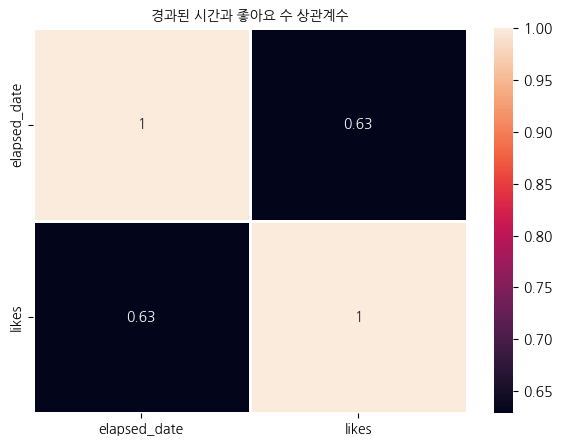

In [36]:
# 히트맵 이용하여 상관관계 확인하기 -> 약한 양의 상관관계!
plt.rcParams["figure.figsize"] =(7, 5)
sns.heatmap(test1.corr(), annot=True, linewidths=1)
plt.title('경과된 시간과 좋아요 수 상관계수', fontsize=10)
plt.show()

<Figure size 1200x1200 with 0 Axes>

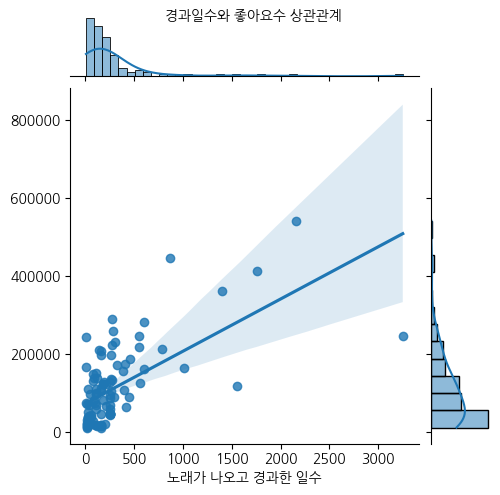

In [37]:
# Top100 경과일수와 좋아요 수 상관관계 
plt.figure(figsize=(12, 12))
jj=sns.jointplot(x="elapsed_date", y="likes", height=5, data=test1, kind='reg') # hue 사용 불가 / 'scatter', 'hist', 'hex', 'kde', 'reg', 'resid'
jj.set_axis_labels(xlabel="노래가 나오고 경과한 일수",rotation=0)
jj.fig.suptitle('경과일수와 좋아요수 상관관계 ',fontsize=10)
# plt.rc('font', family='MaruBuri-Bold')
plt.show()

In [38]:
test1['elapsed_date'].describe()

count     100.000000
mean      293.620000
std       464.919539
min         6.000000
25%        75.000000
50%       165.000000
75%       272.750000
max      3252.000000
Name: elapsed_date, dtype: float64

In [39]:
def elapsed_year(x):
    if x <= 365:
        x="1"
        return x
    elif x <= 730:
        x='2'
        return x
    elif x <= 1095:
        x='3'
        return x
    else :
        x= '4'
        return x

    

In [40]:
each_year=test1.copy()

In [44]:
each_year['year_num']=each_year['elapsed_date'].apply(elapsed_year)
each_year_1=each_year.drop(columns='elapsed_date')
each_year_1

,rank,likes,year_num
0,1,166676,1
1,2,72606,1
2,3,206300,1
3,4,259721,1
4,5,110344,1
...,...,...,...
95,96,12269,1
96,97,36646,1
97,98,81308,1
98,99,14160,1


/home/skpark/anaconda3/envs/airflow_env/lib/python3.7/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


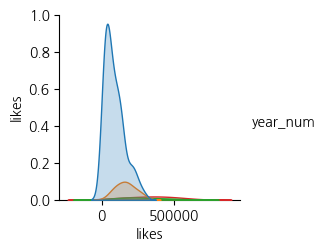

In [51]:
# 1년 비율이 가장 높다.
sns.pairplot(each_year_1, hue='year_num')
plt.show()

In [48]:
each_year_2=each_year_1[each_year_1['year_num']=='1']
each_year_2

,rank,likes,year_num
0,1,166676,1
1,2,72606,1
2,3,206300,1
3,4,259721,1
4,5,110344,1
...,...,...,...
95,96,12269,1
96,97,36646,1
97,98,81308,1
98,99,14160,1


<AxesSubplot:xlabel='elapsed_date', ylabel='likes'>

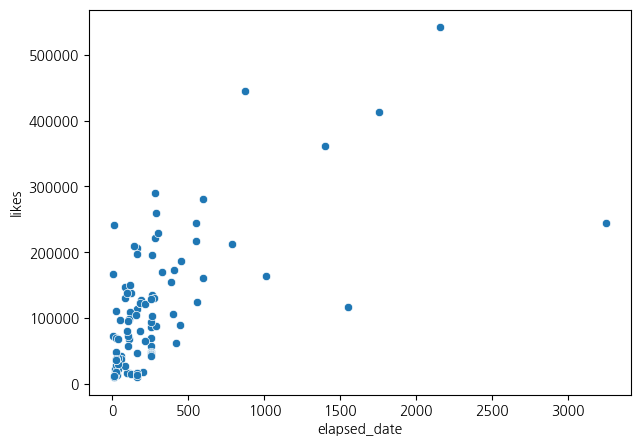

In [21]:
# Top100 노래 발매 경과일에 따른 좋아요 수 분포
sns.scatterplot(data=df_last_1, x='elapsed_date',y='likes')

In [23]:
# 좋아요 수가 많은 노래
df.sort_values(by='likes',ascending=False).head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes
73,63ada61bf8fc5d9fc24b1453,2022.12.29,23:36,74,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542409
166,63aef188e4203c768feab9f2,2022.12.30,23:10,67,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542330
279,63b06dcf2b0745ea8473c0f7,2023.01.01,02:13,80,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542309
668,63b192cd2814be3e5a87c6af,2023.01.01,23:03,69,0,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264
568,63b1927259813fc6126bfbf5,2023.01.01,23:02,69,0,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264


In [24]:
# 최신 노래에 대한 유니크한 데이터값
unique_sing =df.drop_duplicates(subset='title',keep="last")
unique_sing.head()

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes
273,63b06dcf2b0745ea8473c0f1,2023.01.01,02:13,74,-1,Santa Tell Me,Ariana Grande,Santa Tell Me,2292117,5475060,2014.11.24,POP,Universal Music Group,"Republic Records, a division of UMG Recordings...",233958
276,63b06dcf2b0745ea8473c0f4,2023.01.01,02:13,77,0,미리 메리 크리스마스 (Feat. 천둥 Of MBLAQ),아이유,Real,1093562,3053259,2010.12.09,"발라드, 댄스",카카오엔터테인먼트,카카오엔터테인먼트,172502
282,63b06dcf2b0745ea8473c0fa,2023.01.01,02:13,83,-1,크리스마스니까,성시경,Jelly Christmas 2012 HEART PROJECT,2168409,3973781,2012.12.06,발라드,카카오엔터테인먼트,젤리피쉬 엔터테인먼트,164901
286,63b06dcf2b0745ea8473c0fe,2023.01.01,02:13,87,0,WE (Feat. 박재범) (Prod. by Slom),이영지,쇼미더머니 11 Episode 1,11115007,35888870,2022.12.03,랩/힙합,지니뮤직,Stone Music Entertainment,18990
289,63b06dcf2b0745ea8473c101,2023.01.01,02:13,90,0,Last Christmas,Ariana Grande,Christmas Kisses,2222050,4365842,2013.01.01,POP,Universal Music Group,Universal Records,60052


In [25]:
# 가장 많이 순위가 오른 노래
df.sort_values(by='up_down',ascending=True).head()
# +, -를 인식하지 못함

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes
1030,63b4435ead42039ebb20ab4b,2023.01.04,00:01,31,+1,잘가요,주호,잘가요,11115359,35890454,2022.12.04,발라드,워너뮤직,레이벡스,20947
1539,63b988ad63d0b812d2a4b1f7,2023.01.07,23:58,40,+1,자격지심 (Feat. ZICO),BE'O (비오),FIVE SENSES,11067591,35685439,2022.09.29,"랩/힙합, R&B/Soul, 록/메탈",카카오엔터테인먼트,"빅플래닛메이드, SWING ENTERTAINMENT, 페임어스 엔터테인먼트",72399
1296,63b5871d61ca2efc72458da5,2023.01.04,23:02,97,+1,인생은 뷰티풀,김호중,인생은 뷰티풀: 비타돌체,11048906,35609035,2022.09.07,"국내영화, 발라드",카카오엔터테인먼트,(주)생각엔터테인먼트,15596
1035,63b4435ead42039ebb20ab50,2023.01.04,00:01,36,+1,"미운오리새끼 (Feat. 선우정아, BOBBY) (Prod. R.Tee)",허성현 (Huh),쇼미더머니 11 Semi Final,11129861,35957694,2022.12.24,랩/힙합,지니뮤직,Stone Music Entertainment,21543
1731,63bacd3364caecf725179b3d,2023.01.08,23:03,32,+1,잘가요,주호,잘가요,11115359,35890454,2022.12.04,발라드,워너뮤직,레이벡스,22382


In [26]:
# Top100안에 많이 배출한 기획사 top10
unique_sing.groupby('album_agency')['singer'].count().to_frame().reset_index().sort_values(by='singer',ascending=False).head(10)

,album_agency,singer
41,물고기뮤직,12
22,Stone Music Entertainment,10
20,SM ENTERTAINMENT,10
2,(주)생각엔터테인먼트,7
4,ADOR,5
6,BIGHIT MUSIC,5
50,스타쉽엔터테인먼트,3
26,YG Entertainment,3
55,일팔 프로젝트,2
21,SM Entertainment,2


In [27]:
# 누적 좋아요수가 높은 top10
unique_sing.groupby('singer')['likes'].sum().to_frame().reset_index().sort_values(by='likes',ascending=False).head(10)

,singer,likes
34,방탄소년단,1607439
49,임영웅,962721
19,NewJeans,756188
13,IVE (아이브),604475
18,NCT DREAM,516124
38,성시경,421776
60,폴킴,412673
47,이무진,398998
1,(여자)아이들,376762
51,잔나비,361141


### 질문
#### 단기간 내에 좋아요수가 가장 빠르게 오른 핫한 가수는 누구일까?


In [28]:
# 방탄소년단 봄날 데이터만 저장
bts=df[df['singer']=="방탄소년단"]
bts.sort_values(by='album_date',ascending=True)
bts_first =bts[bts['title']=='봄날']

In [29]:
# Airflow로 자동화 구현하였으나 VirtualBox 서버를 켜야만 가능하다는 점에 수동으로 데이터 수집
bts_spring=bts_first.drop_duplicates(subset='likes',keep='last')
bts_spring.sort_values(by='likes',ascending=False)

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes
73,63ada61bf8fc5d9fc24b1453,2022.12.29,23:36,74,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542409
166,63aef188e4203c768feab9f2,2022.12.30,23:10,67,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542330
279,63b06dcf2b0745ea8473c0f7,2023.01.01,02:13,80,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542309
865,63b2f611dd2a3a3cb6b918df,2023.01.03,00:19,66,0,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264
1061,63b4435ead42039ebb20ab6a,2023.01.04,00:01,62,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542162
1270,63b5871d61ca2efc72458d8b,2023.01.04,23:02,71,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542071
1468,63b6d8175d0f94b5d8b98337,2023.01.05,23:00,69,+4,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542011
1669,63b988e683a34972b2c65130,2023.01.07,23:59,70,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,541924
1764,63bacd3364caecf725179b5e,2023.01.08,23:03,65,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017.02.13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,541839


In [30]:
import datetime
today=datetime.date.today()
today

datetime.date(2023, 1, 9)

In [31]:
tt=bts_spring['date']
test=tt.values[0]
test

'2022.12.29'

In [32]:
# datetime 전환성공!
# to_datetime 활용!
bts_spring['date']=pd.to_datetime(bts_spring['date'])
bts_spring['album_date']=pd.to_datetime(bts_spring['album_date'])
bts_spring['after_date']=bts_spring['date']-bts_spring['album_date']
bts_spring

/home/skpark/anaconda3/envs/airflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/skpark/anaconda3/envs/airflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/skpark/anaconda3/envs/airflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:

,_id,date,time,rank,up_down,title,singer,album,album_code,index,album_date,album_genre,album_publisher,album_agency,likes,after_date
73,63ada61bf8fc5d9fc24b1453,2022-12-29,23:36,74,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017-02-13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542409,2145 days
166,63aef188e4203c768feab9f2,2022-12-30,23:10,67,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017-02-13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542330,2146 days
279,63b06dcf2b0745ea8473c0f7,2023-01-01,02:13,80,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017-02-13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542309,2148 days
865,63b2f611dd2a3a3cb6b918df,2023-01-03,00:19,66,0,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017-02-13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542264,2150 days
1061,63b4435ead42039ebb20ab6a,2023-01-04,00:01,62,+5,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017-02-13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542162,2151 days
1270,63b5871d61ca2efc72458d8b,2023-01-04,23:02,71,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017-02-13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542071,2151 days
1468,63b6d8175d0f94b5d8b98337,2023-01-05,23:00,69,+4,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017-02-13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,542011,2152 days
1669,63b988e683a34972b2c65130,2023-01-07,23:59,70,+1,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017-02-13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,541924,2154 days
1764,63bacd3364caecf725179b5e,2023-01-08,23:03,65,+3,봄날,방탄소년단,YOU NEVER WALK ALONE,10037969,30244931,2017-02-13,"랩/힙합, 발라드",YG PLUS,BIGHIT MUSIC,541839,2155 days
